In [4]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

start = 10
end = 70
big_number = "27"

number = []
for n in range(start,end):
    num_str = "YSC19900"+ big_number + "%03d" % n
    number.append(num_str)

status_tx = []
for rec_num in number:
    if __name__ == '__main__':
        params={'changeLocale':'',
                'completedActionsCurrentPage':'0',
                'upcomingActionsCurrentPage':'0',
                'appReceiptNum': rec_num,
                'caseStatusSearchBtn':'CHECK STATUS'}
        target = 'https://egov.uscis.gov/casestatus/mycasestatus.do'
        req = requests.post(url = target, data=params)
        html = req.text
        bf = BeautifulSoup(html,"lxml")
        texts = bf.find_all('div', class_ = 'rows text-center')
        
        for each in texts:
            status = each.find_all('h1')
            status_tx.append(status[0].text.replace('',''))
        
        print(rec_num,
              #texts[0].text.replace('',''),
              status[0].text.replace('',''))
        
        

YSC1990027010 Case Was Received
YSC1990027011 Case Was Received
YSC1990027012 Case Was Received
YSC1990027013 Case Was Received
YSC1990027014 Case Was Received
YSC1990027015 Case Was Received
YSC1990027016 New Card Is Being Produced
YSC1990027017 New Card Is Being Produced
YSC1990027018 Case Was Received
YSC1990027019 Case Was Received
YSC1990027020 Date of Birth Was Updated
YSC1990027021 Case Was Received
YSC1990027022 Case Was Received
YSC1990027023 Case Was Received
YSC1990027024 Case Was Received
YSC1990027025 Case Was Received
YSC1990027026 Case Was Received
YSC1990027027 Case Was Received
YSC1990027028 Card Was Picked Up By The United States Postal Service
YSC1990027029 Case Was Received
YSC1990027030 Case Was Received
YSC1990027031 Case Was Received
YSC1990027032 Case Was Received
YSC1990027033 Card Was Delivered To Me By The Post Office
YSC1990027034 Case Was Received
YSC1990027035 Case Was Received
YSC1990027036 New Card Is Being Produced
YSC1990027037 New Card Is Being Produc

In [136]:
status_type = set(status_tx)
print(status_type)

{'Card Was Delivered To Me By The Post Office', 'Card Was Mailed To Me', 'New Card Is Being Produced', 'Case Rejected Because I Sent An Incorrect Fee', 'Case Was Received', 'Notice Was Returned To USCIS Because The Post Office Could Not Deliver It', 'Case Was Rejected Because It Was Improperly Filed', 'Form G-28 Was Rejected Because It Was Improperly Filed', 'Fees Were Waived'}


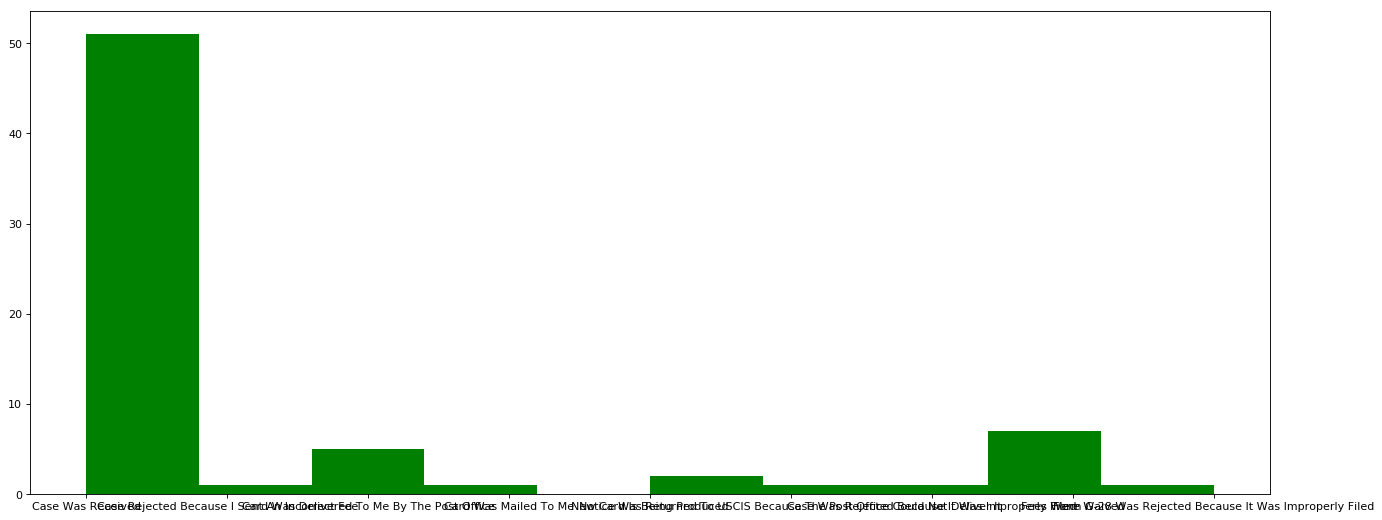

In [137]:
plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
plt.hist(status_tx, color = "green")
plt.show()